## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

study_results = pd.read_csv(study_results_path)
study_results.head()

# Combine the data into a single dataset
mice_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(mice_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mice_duplicate_id = mice_df.loc[mice_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mice_duplicate_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df = mice_df[mice_df['Mouse ID'].isin(mice_duplicate_id)==True]
duplicate_mice_df.count()

Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mice_df[mice_df['Mouse ID'].isin(mice_duplicate_id)==False]


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

regimen_df = clean_mice_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_vol_mean = regimen_df["Tumor Volume (mm3)"].mean() 
tumor_vol_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_vol_std = regimen_df["Tumor Volume (mm3)"].std()
tumor_vol_var = tumor_vol_std**2
tumor_vol_sem = regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_stat_df = pd.DataFrame({"Mean": tumor_vol_mean, 
                               "Median": tumor_vol_median,
                                "Variance": tumor_vol_var,
                                "Standard deviation": tumor_vol_std,
                                "SEM": tumor_vol_sem 
                               })


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stat_df

# Using the aggregation method, produce the same summary statistics in a single line

regimen_df.describe()


Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          148.0  10.006757  6.946341  1.0   5.00   7.5  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          148.0  27.135135  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Measurements for each Treatment Regimen')

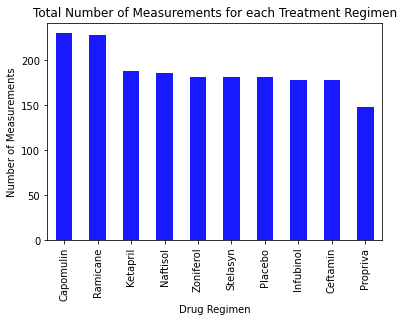

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_bar_plot = clean_mice_df["Drug Regimen"].value_counts().plot.bar(color='b', alpha=0.9, align="center")

# Set a Title and labels
regimen_bar_plot.set_xlabel("Drug Regimen")
regimen_bar_plot.set_ylabel("Number of Measurements")
regimen_bar_plot.set_title("Total Number of Measurements for each Treatment Regimen")


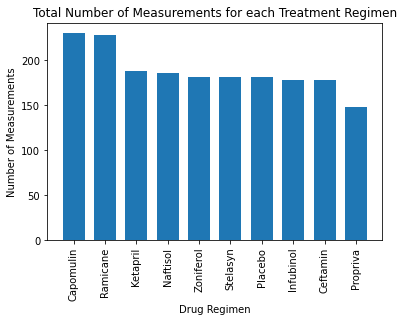

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements = clean_mice_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(measurements))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_mice_df["Drug Regimen"], rotation="vertical")

plt.bar(x_axis, measurements, width = 0.7)
plt.xticks(tick_locations, measurements.index.values)

# Set a Title and labels
plt.title("Total Number of Measurements for each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()


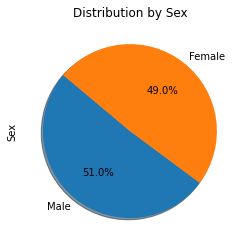

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distribution_data = clean_mice_df['Sex'].value_counts()
distribution_data

pie_plot = distribution_data.plot.pie(autopct="%1.1f%%", shadow=True, startangle=140, title="Distribution by Sex")
                                     



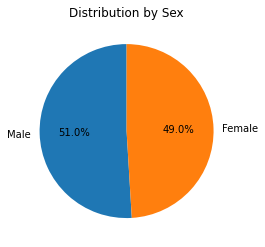

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution_data = clean_mice_df['Sex'].value_counts()

plt.pie(distribution_data, labels=distribution_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = pd.DataFrame(clean_mice_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "max_timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_mice_df = pd.merge(mice_df, max_timepoint_df, on='Mouse ID')
merged_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data_df = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in treatments:
    tumor_vol_df = merged_mice_df.loc[merged_mice_df["Drug Regimen"] == drug]
      
             
    # add subset 
        
    tumor_subset_df = tumor_vol_df.loc[tumor_vol_df["Timepoint"] == tumor_vol_df["max_timepoint"]]
    
    tumor_vol = tumor_subset_df["Tumor Volume (mm3)"]
    tumor_data_df.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {drug}: {iqr}")
    
    # Find upper and lower bounds to help identify outliers for each regimen
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound for {drug}: {lower_bound}")
    print(f"Upper Bound for {drug}: {upper_bound}")
    
    # Quantitatively determine if there are any potential outliers
    
    outliers = (tumor_vol.loc[(tumor_subset_df["Tumor Volume (mm3)"] >= upper_bound) | 
                                        (tumor_subset_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"Number of {drug} outliers: {outliers}")
                                       

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


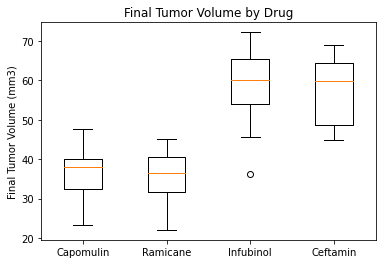

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# plot boxplot syntax adopted from matplotlib.org

plt.boxplot(tumor_data_df)

# titles and labels

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()



## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse s185')

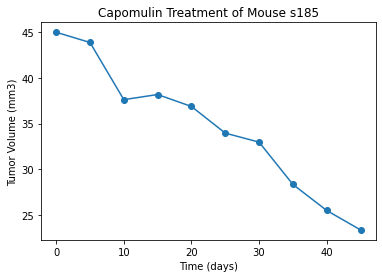

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# mice treated with Capomulin
# syntax adopted from  w3schools.com

capomulin_df = merged_mice_df.loc[merged_mice_df['Drug Regimen'] == 'Capomulin']
capomulin_df


mouse = merged_mice_df.loc[merged_mice_df['Mouse ID'] == 's185']


plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# labels and title
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")



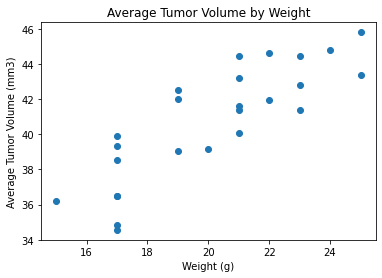

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_vol_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})
                                                                                                                                           

avg_tumor_vol_df = pd.merge(capomulin_df, avg_vol_df, on="Mouse ID")
nodupl_avg_tumor_vol_df = avg_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
nodupl_avg_tumor_vol_df

x = nodupl_avg_tumor_vol_df["Weight (g)"]
y = nodupl_avg_tumor_vol_df["avg_tumor_vol"]

plt.scatter(x, y)

# labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

plt.show()



## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# syntax adopted from https://www.w3schools.com/datascience/ds_stat_correlation.asp

correlation = st.pearsonr(x,y)
print(f"""Correlation between weight and average tumor volume
for Capomulin regimen: {round(correlation[0],2)}""")


Correlation between weight and average tumor volume
for Capomulin regimen: 0.84


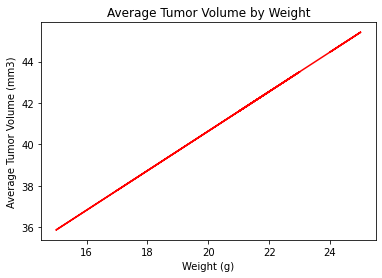

In [58]:
# Linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

# syntax adopted from https://www.w3schools.com/datascience/ds_linear_regression.asp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")

# labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()
